In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [5]:
df = pd.read_csv('churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [6]:
df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [7]:
df['Int\'l Plan']=df['Int\'l Plan'].map({'yes':1, 'no':0})
df['VMail Plan']=df['VMail Plan'].map({'yes':1, 'no':0})
df['Churn?']=df['Churn?'].map({'True.':1, 'False.':0})
df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [8]:
y=df['Churn?']
X=df.iloc[:,:-1] #Todas las columnas menos la última

In [9]:
X=X.drop(columns=['Phone', 'State'])
X.head(2)

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

Modelo y accuracy 

In [12]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)
print('The accuracy is', model.score(X_test,y_test))

The accuracy is 0.9400479616306955


Matriz de confusión

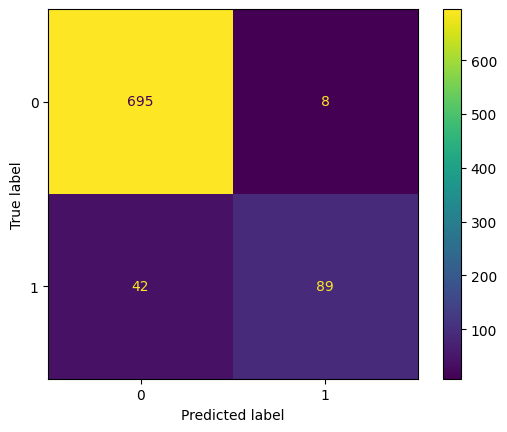

In [14]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);


* *El modelo no es tan bueno para predecir 1 cuando en realidad es 1 (Que el cliente se quede con la Cía.) Tiende a decir que es 0 (Es decir, que el cliente abandona)* 

* *El modelo es muy bueno para predecir 0 cuando en realidad es 0 (Es decir, detectar quienes sí abandonan)*

In [19]:
y_hat = model.predict(X_test)

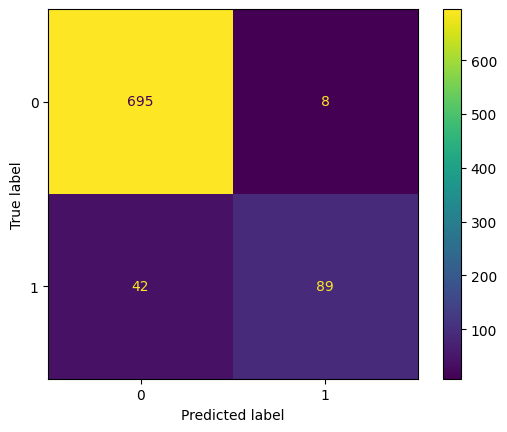

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

* *Se pueden observar los mismos resultados que en la matriz anterior*

Valores de precisión y recall

In [16]:
precision_score(y_test,y_hat), recall_score(y_test,y_hat)

(0.9175257731958762, 0.6793893129770993)

* *Recall score no es tan bueno; sin embargo, puedes decir que el modelo funciona gracias al score de precisión*

5 características más importantes

Account Length - Feature: 0, Score: 0.03015
Area Code - Feature: 1, Score: 0.00804
Int'l Plan - Feature: 2, Score: 0.08638
VMail Plan - Feature: 3, Score: 0.01952
VMail Message - Feature: 4, Score: 0.02865
Day Mins - Feature: 5, Score: 0.13744
Day Calls - Feature: 6, Score: 0.03532
Day Charge - Feature: 7, Score: 0.13843
Eve Mins - Feature: 8, Score: 0.06976
Eve Calls - Feature: 9, Score: 0.02650
Eve Charge - Feature: 10, Score: 0.06464
Night Mins - Feature: 11, Score: 0.03320
Night Calls - Feature: 12, Score: 0.02945
Night Charge - Feature: 13, Score: 0.03424
Intl Mins - Feature: 14, Score: 0.04248
Intl Calls - Feature: 15, Score: 0.05415
Intl Charge - Feature: 16, Score: 0.04592
CustServ Calls - Feature: 17, Score: 0.11573


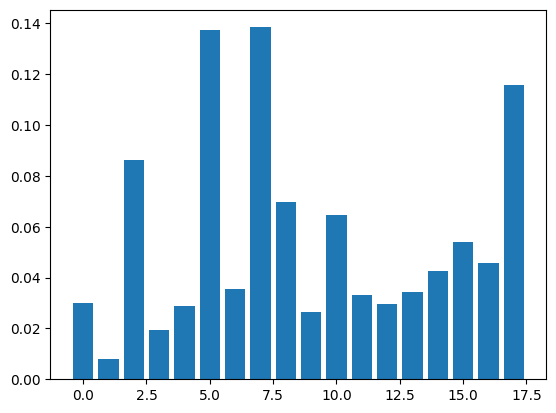

In [34]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(X.columns[i],'- Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

3 primeras divisiones de los primeros 15 árboles del RF

In [37]:
from sklearn.tree import plot_tree
import graphviz

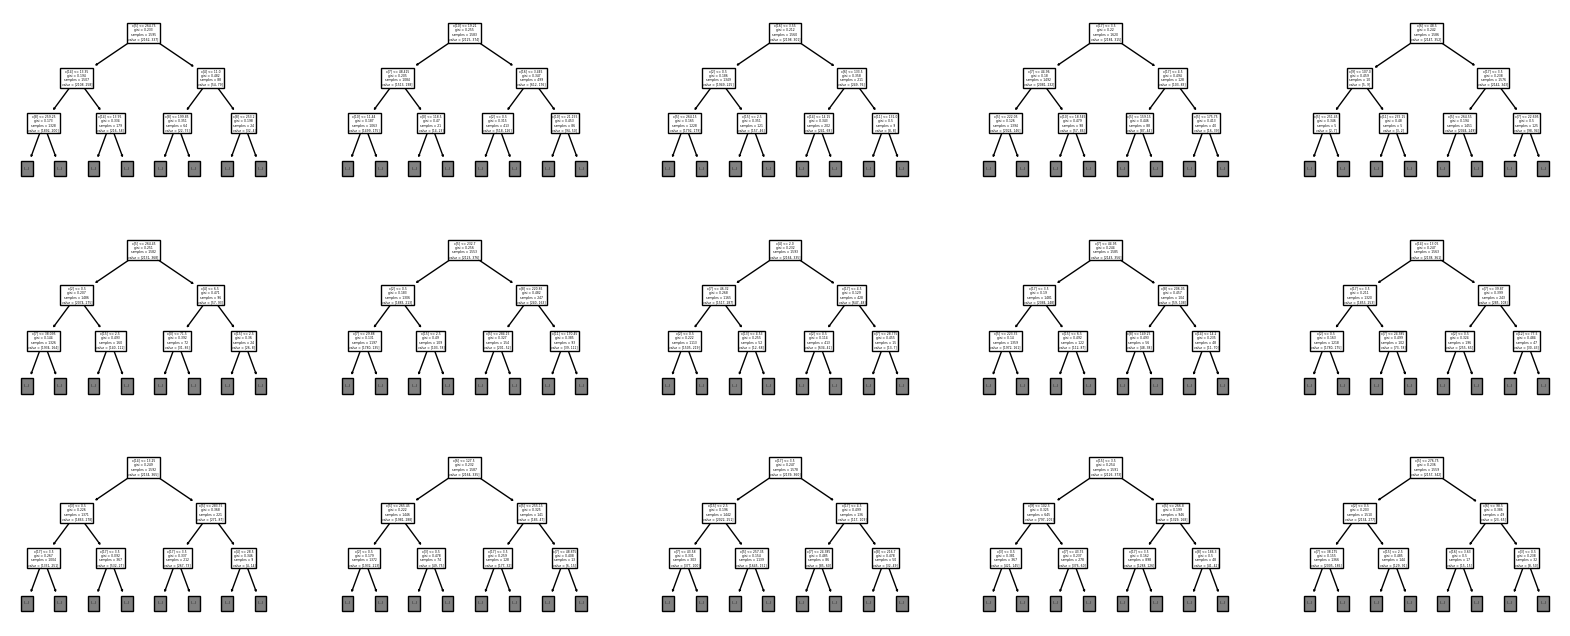

In [39]:
fig, axs = plt.subplots(3,5, figsize=(20,8))
axs = axs.flatten()
for i in range(15):
    tree = model.estimators_[i]
    plot_tree(model.estimators_[i], max_depth=2, ax=axs[i])


Creación de 50 árboles

In [41]:
trees = np.arange(1,51)
accuracy = np.empty(50)

for i in range(50):
    model=RandomForestClassifier(n_estimators=trees[i]).fit(X_train,y_train)
    acc = model.score(X_test,y_test)
    accuracy[i]=acc

print(accuracy)

[0.88968825 0.88489209 0.91726619 0.92086331 0.9352518  0.91007194
 0.93405276 0.92925659 0.9352518  0.91966427 0.93285372 0.93045564
 0.93884892 0.93884892 0.93405276 0.93645084 0.94604317 0.92925659
 0.93165468 0.93884892 0.941247   0.93405276 0.93645084 0.92685851
 0.93285372 0.93884892 0.93405276 0.93764988 0.93645084 0.941247
 0.93884892 0.93405276 0.94244604 0.93884892 0.941247   0.93045564
 0.93645084 0.93764988 0.94244604 0.93764988 0.93884892 0.93764988
 0.93764988 0.9352518  0.93165468 0.93764988 0.94244604 0.9352518
 0.94244604 0.9352518 ]


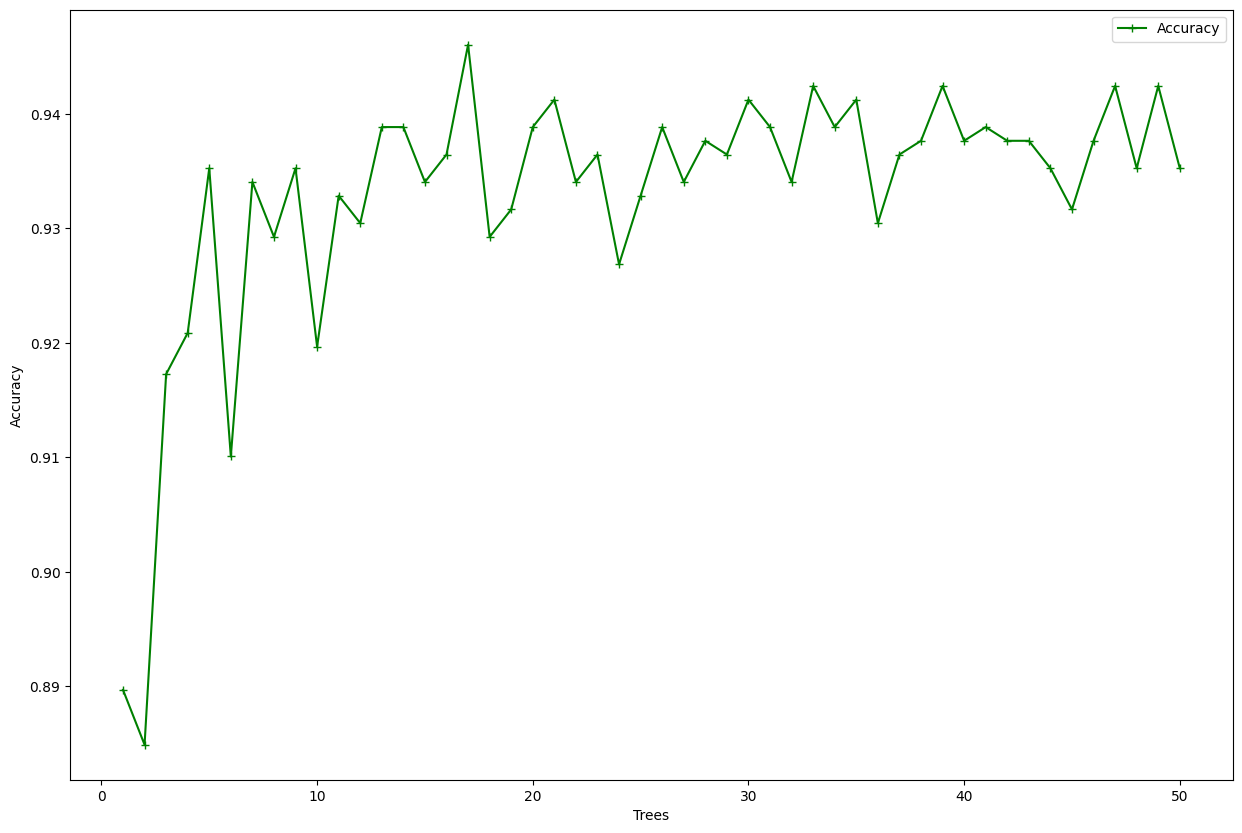

In [46]:
plt.figure(figsize=(15,10))
plt.plot(trees, accuracy, label='Accuracy', marker='+', c='green')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.legend()


In [50]:
accuracy.max()

0.9460431654676259

* *A partir de los 20 árboles, añadir más no reditúa en mayor accuracy*

In [55]:
accuracy_features=[]
features=len(X_train.columns)
num = range(1,features)

for i in num:
    model=RandomForestClassifier(max_features=i, n_estimators=17).fit(X_train,y_train)
    #donde el accuracy es más alto es cuando el número de árboles es 17
    accuracy_features.append(model.score(X_test,y_test))

In [56]:
accuracy_features

[0.8812949640287769,
 0.9052757793764988,
 0.9280575539568345,
 0.935251798561151,
 0.9376498800959233,
 0.9460431654676259,
 0.9400479616306955,
 0.9376498800959233,
 0.9376498800959233,
 0.9412470023980816,
 0.9412470023980816,
 0.935251798561151,
 0.9424460431654677,
 0.9328537170263789,
 0.9400479616306955,
 0.9328537170263789,
 0.934052757793765]

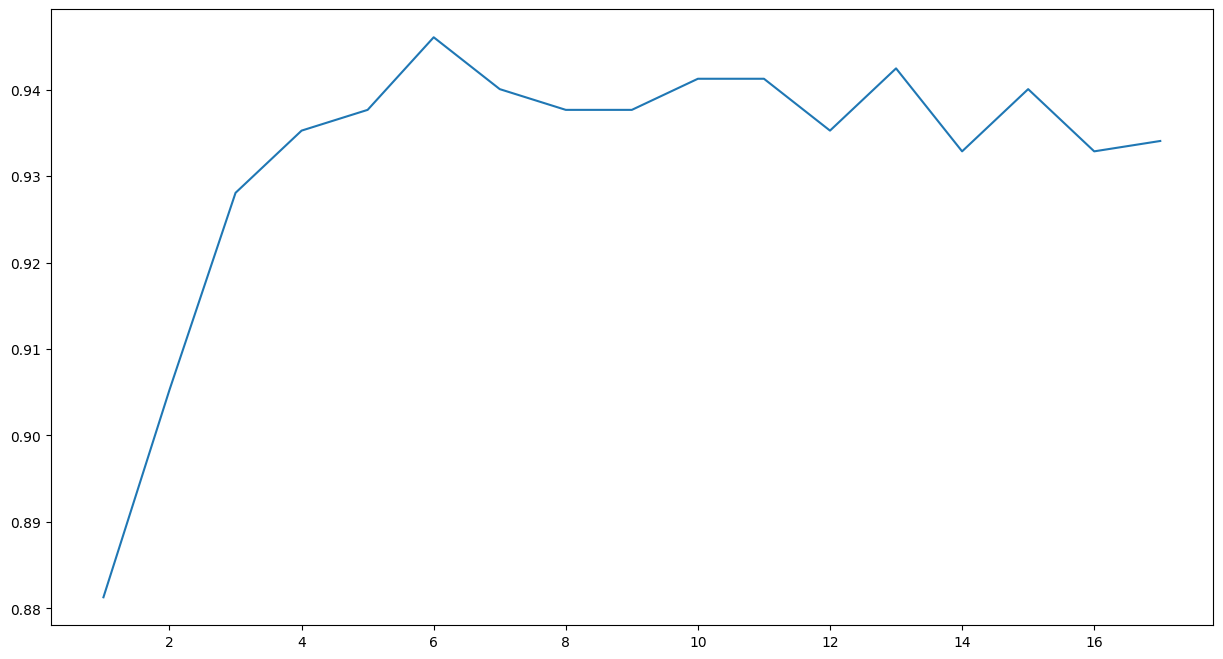

In [57]:
plt.figure(figsize=(15,8))
plt.plot(num,accuracy_features,label='Accuracy')

* *De acuerdo con los datos, y utilizando 17 árboles según el desempeño del número de árboles (gráfico anterior), pareciera que el óptimo de features es 6*

También pueden verse los óptimos de los hiperparámetros (features y número de árboles) utilizando GridSearch...

In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
parametros = {'n_estimators': range(10,20,2),  #Número de árboles a testear
              'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1,5)) + [None],
              'max_features': ['log2', 'sqrt']
}

model=RandomForestClassifier()
gs=GridSearchCV(model, parametros, cv=5, n_jobs=1)
gs.fit(X_train,y_train)
gs.best_score_, gs.best_params_



(0.9515775551102206,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'log2',
  'n_estimators': 18})

* *Utilizando GridSearch, se logra un accuracy superior a la obtenida en los puntos anteriores dado que testea todas las alternativas listadas*

Ajustando otros modelos...

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression

In [66]:
lr=LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.1632857468062795

In [67]:
logit = LogisticRegression(max_iter=1000000).fit(X_train,y_train)
logit.score(X_test,y_test)

0.8453237410071942

* *El uso de Random Forest es superior a los modelos ajustados en cuanto a su accuracy*